In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
churn=pd.read_csv(r'C:\Users\Administrator\Datas\数据分析\6-数据分析和数据挖掘\churn.csv')

In [60]:
churn

,Churn,gender,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges
0,No,Female,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85
1,No,Male,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50
2,Yes,Male,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15
3,No,Male,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75
4,Yes,Female,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Male,1,1,1,1,0,1,1,0,1,0,0,0,84.80,1990.50
7039,No,Female,1,1,1,0,1,1,1,0,1,0,1,0,103.20,7362.90
7040,No,Female,1,1,0,1,0,0,0,1,0,0,0,1,29.60,346.45
7041,Yes,Male,1,0,1,0,1,0,0,1,0,0,0,0,74.40,306.60


In [61]:

churn=pd.get_dummies(churn)
churn.head()

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,gender_Female,gender_Male
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,1,0,1,0
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,1,0,0,1
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,0,1,0,1
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,1,0,0,1
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,0,1,1,0


In [62]:
churn.drop(['Churn_No','gender_Male'],axis=1,inplace=True)

In [63]:
churn.columns=churn.columns.str.lower()
churn.head()
# 小写

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,churn_yes,gender_female
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,0,1
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,1,0
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,0,0
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,1,1


In [64]:
churn=churn.rename(columns={'churn_yes':'flag'})
#二分类模型，分析flag 1和0的占比
churn.flag.value_counts()
churn

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,flag,gender_female
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,0,1
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,1,0
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,0,0
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,0,1,0,0,0,84.80,1990.50,0,0
7039,1,1,1,0,1,1,1,0,1,0,1,0,103.20,7362.90,0,1
7040,1,1,0,1,0,0,0,1,0,0,0,1,29.60,346.45,0,1
7041,1,0,1,0,1,0,0,1,0,0,0,0,74.40,306.60,1,0


In [65]:
churn.flag.value_counts(1)

0    0.73463
1    0.26537
Name: flag, dtype: float64

In [66]:
summary=churn.groupby('flag')
summary.mean()

,partner_att,dependents_att,landline,internet_att,internet_other,streamingtv,streamingmovies,contract_month,contract_1yr,paymentbank,paymentcreditcard,paymentelectronic,monthlycharges,totalcharges,gender_female
flag,,,,,,,,,,,,,,,
0,0.528218,0.344801,0.901044,0.379204,0.347700,0.365868,0.369927,0.429068,0.252609,0.248550,0.249324,0.250097,61.265124,2545.918081,0.492656
1,0.357945,0.174425,0.909042,0.245586,0.693954,0.435527,0.437667,0.885500,0.088818,0.138042,0.124131,0.573034,74.441332,1528.514714,0.502408


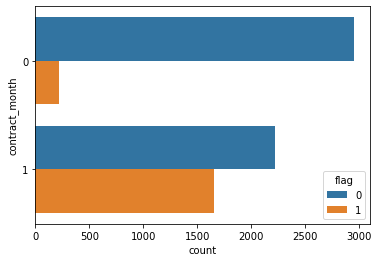

In [67]:
sns.countplot(y='contract_month',hue='flag',data=churn)

In [68]:
churn.corr()[['flag']].sort_values('flag',ascending=False)

,flag
flag,1.000000
contract_month,0.405103
internet_other,0.308020
paymentelectronic,0.301919
monthlycharges,0.193356
streamingtv,0.063228
streamingmovies,0.061382
landline,0.011942
gender_female,0.008612
paymentbank,-0.117937


In [69]:
#设定因变量与自变量， y 是 flag, x 根据刚才的相关分析挑选contract_month,internet_other与streamingtv
#自变量可以分为几类，partner/dependents,internet,streaming，contract,payment,charges，后续大家可以自己挑选进行建模
# y=churn['flag']
# x=churn[['contract_month','internet_other','streamingtv']]

In [70]:
y=churn['flag']
x=churn[['contract_month','internet_other','paymentelectronic']]
#调用sklearn模块，随机抽取训练集与测试集

In [73]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

#模型优化，测试集与训练集对半分,第三次也跑这里
# from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=100)
#使用sklearn

from sklearn import linear_model

lr=linear_model.LogisticRegression()

lr.fit(x_train,y_train)


LogisticRegression()

In [74]:
from numpy import *
#第一次
lr.intercept_
lr.coef_
#array([-3.21761938])
#array([[2.19790192, 1.14360005, 0.23641705]])
#第二次，测试集与训练集对半分
lr.intercept_
array([-3.26144359])
array([[2.23886897, 1.09248895, 0.32579547]])
#第三次，变量调整
array([-3.18770265])
array([[2.0019671 , 1.02830763, 0.62165925]])

array([[2.0019671 , 1.02830763, 0.62165925]])

In [75]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)
import sklearn.metrics as metrics
metrics.accuracy_score(y_train,y_pred_train)
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_train,y_pred_train)
roc_auc=auc(fpr,tpr)
roc_auc

0.6669635362478181